In [1]:
# for numerical analysis and data processing
import numpy as np
import pandas as pd
import itertools

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# for Machine learning algorithms
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial.distance import cdist

# for vizualizations
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# IMPORT THE DATA SET

In [2]:
df = pd.read_csv("loan.csv", low_memory =False)
pd.set_option('display.max_columns',None)
df.fillna(0,inplace=True)

In [3]:
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'years',value=r'')
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'year',value=r'')
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'10+ ',value=r'10')
df['emp_length'].replace(regex=True,inplace=True,to_replace=r'< 1',value=r'10')
df['emp_length'] = df['emp_length'].replace('10+ ','10')

df['term'].replace(regex=True,inplace=True,to_replace=r'months',value=r'')

df1 = pd.get_dummies(df['grade'])
df2 = pd.get_dummies(df['home_ownership'])
df3 = pd.get_dummies(df['verification_status'])
df4 = pd.get_dummies(df['purpose'])
df5 = pd.get_dummies(df['loan_status'])
df6 = pd.get_dummies(df['sub_grade'])
df7 =pd.get_dummies(df['addr_state'])
df8 =pd.get_dummies(df['earliest_cr_line'])

df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8],axis=1)

df['term'] =df['term'].astype(float)
df['emp_length'] =df['emp_length'].astype(float)


df = df.drop(columns = ['id','member_id','zip_code','url','desc','emp_title','grade','sub_grade','earliest_cr_line','addr_state','issue_d','pymnt_plan','title','home_ownership','verification_status', 'purpose','loan_status'])
df = df.drop(columns =['application_type','initial_list_status' , 'last_pymnt_d','next_pymnt_d','last_credit_pull_d'])
df_orig =df

df_orig.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,A,B,C,D,E,F,G,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,0,Apr-1955,Apr-1958,Apr-1960,Apr-1961,Apr-1962,Apr-1963,Apr-1964,Apr-1965,Apr-1966,Apr-1967,Apr-1968,Apr-1969,Apr-1970,Apr-1971,Apr-1972,Apr-1973,Apr-1974,Apr-1975,Apr-1976,Apr-1977,Apr-1978,Apr-1979,Apr-1980,Apr-1981,Apr-1982,Apr-1983,Apr-1984,Apr-1985,Apr-1986,Apr-1987,Apr-1988,Apr-1989,Apr-1990,Apr-1991,Apr-1992,Apr-1993,Apr-1994,Apr-1995,Apr-1996,Apr-1997,Apr-1998,Apr-1999,Apr-2000,Apr-2001,Apr-2002,Apr-2003,Apr-2004,Apr-2005,Apr-2006,Apr-2007,Apr-2008,Apr-2009,Apr-2010,Apr-2011,Apr-2012,Aug-1946,Aug-1950,Aug-1951,Aug-1955,Aug-1958,Aug-1959,Aug-1960,Aug-1961,Aug-1962,Aug-1963,Aug-1964,Aug-1965,Aug-1966,Aug-1967,Aug-1968,Aug-1969,Aug-1970,Aug-1971,Aug-1972,Aug-1973,Aug-1974,Aug-1975,Aug-1976,Aug-1977,Aug-1978,Aug-1979,Aug-1980,Aug-1981,Aug-1982,Aug-1983,Aug-1984,Aug-1985,Aug-1986,Aug-1987,Aug-1988,Aug-1989,Aug-1990,Aug-1991,Aug-1992,Aug-1993,Aug-1994,Aug-1995,Aug-1996,Aug-1997,Aug-1998,Aug-1999,Aug-2000,Aug-2001,Aug-2002,Aug-2003,Aug-2004,Aug-2005,Aug-2006,Aug-2007,Aug-2008,Aug-2009,Aug-2010,Aug-2011,Aug-2012,Dec-1950,Dec-1951,Dec-1956,Dec-1958,Dec-1959,Dec-1960,Dec-1961,Dec-1962,Dec-1963,Dec-1964,Dec-1965,Dec-1966,Dec-1967,Dec-1968,Dec-1969,Dec-1970,Dec-1971,Dec-1972,Dec-1973,Dec-1974,Dec-1975,Dec-1976,Dec-1977,Dec-1978,Dec-1979,Dec-1980,Dec-1981,Dec-1982,Dec-1983,Dec-1984,Dec-1985,Dec-1986,Dec-1987,Dec-1988,Dec-1989,Dec-1990,Dec-1991,Dec-1992,Dec-1993,Dec-1994,Dec-1995,Dec-1996,Dec-1997,Dec-1998,Dec-1999,Dec-2000,Dec-2001,Dec-2002,Dec-2003,Dec-2004,Dec-2005,Dec-2006,Dec-2007,Dec-2008,Dec-2009,Dec-2010,Dec-2011,Feb-1957,Feb-1959,Feb-1960,Feb-1961,Feb-1963,Feb-1964,Feb-1965,Feb-1966,Feb-1967,Feb-1968,Feb-1969,Feb-1970,Feb-1971,Feb-1972,Feb-1973,Feb-1974,Feb-1975,Feb-1976,Feb-1977,Feb-1978,Feb-1979,Feb-1980,Feb-1981,Feb-1982,Feb-1983,Feb-1984,Feb-1985,Feb-1986,Feb-1987,Feb-1988,Feb-1989,Feb-1990,Feb-1991,Feb-1992,Feb-1993,Feb-1994,Feb-1995,Feb-1996,Feb-1997,Feb-1998,Feb-1999,Feb-2000,Feb-2001,Feb-2002,Feb-2003,Feb-2004,Feb-2005,Feb-2006,Feb-2007,Feb-2008,Feb-2009,Feb-2010,Feb-2011,Feb-2012,Jan-1944,Jan-1946,Jan-1948,Jan-1950,Jan-1951,Jan-1952,Jan-1953,Jan-1954,Jan-1955,Jan-1956,Jan-1957,Jan-1958,Jan-1959,Jan-1960,Jan-1961,Jan-1962,Jan-1963,Jan-1964,Jan-1965,Jan-1966,Jan-1967,Jan-1968,Jan-1969,Jan-1970,Jan-1971,Jan-1972,Jan-1973,Jan-1974,Jan-1975,Jan-1976,Jan-1977,Jan-1978,Jan-1979,Jan-1980,Jan-1981,Jan-1982,Jan-1983,Jan-1984,Jan-1985,Jan-1986,Jan-1987,Jan-1988,Jan-1989,Jan-1990,Jan-1991,Jan-1992,Jan-1993,Jan-1994,Jan-1995,Jan-1996,Jan-1997,Jan-1998,Jan-1999,Jan-2000,Jan-2001,Jan-2002,Jan-2003,Jan-2004,Jan-2005,Jan-2006,Jan-2007,Jan-2008,Jan-2009,Ja

Numerical and Categorical features

In [4]:
numeric_columns = df_orig.select_dtypes(include=['float64','int64']).columns
categorical_columns = df_orig.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df_orig[col] = df_orig[col].astype('category')

In [5]:
numeric_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [6]:
categorical_columns

Index(['verification_status_joint'], dtype='object')

In [7]:
categories={}
for cat in categorical_columns:
    categories[cat] = df_orig[cat].cat.categories.tolist()

In [11]:
#p_categories = df_orig['purpose'].cat.categories.tolist()
#s_categories = df_orig['addr_state'].cat.categories.tolist()
df_orig[categorical_columns] = df_orig[categorical_columns].apply(lambda x: x.cat.codes)

In [12]:
min_rate= df_orig['int_rate'].min()
max_rate= df_orig['int_rate'].max()
print(min_rate, max_rate, max_rate- min_rate)

5.32 28.99 23.669999999999998


# Train-test split

The data is split into training and testing data. x represents the input features whereas y represents the output i.e. the interest rate.As a rule of thumb, we split the data into 80% training data and 20% testing or validation data.

In [16]:
y = df_orig.iloc[:,df_orig.columns.isin(["int_rate"])]
x = df_orig.loc[:,~df_orig.columns.isin(["int_rate"])]

total_samples=len(df)
split = 0.8

x_train = x[0:int(total_samples*split)]
x_test = x[int(total_samples*split):total_samples]
y_train = y[0:int(total_samples*split)]
y_test = y[int(total_samples*split):total_samples]

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    Calculates mean absolute error of the true and predicted values.
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

In [18]:
def view_metrics(y_test, predictions, algorithm, samples, total_samples):
    '''
    Plots the true and predicted values and prints RMS, MAE and MAPE metrics.
    '''
    fig = plt.figure(figsize=(18,5))
    plt.scatter(x=[i for i in range(samples)], y=[x for x in predictions[0:samples]], label='Predicted values')
    plt.scatter(x=[i for i in range(samples)], y=[x[0] for x in y_test.values[0:samples]], label='True values')
    plt.title('True and Predicted values for test dataset - %s' % algorithm)
    plt.legend()
    plt.show()
    
#     fig = plt.figure(figsize=(18,5))
#     plt.scatter(x=[i for i in range(total_samples)], y=[x for x in predictions], label='Predicted values')
#     plt.scatter(x=[i for i in range(total_samples)], y=[x[0] for x in y_test.values], label='True values')
#     plt.title('True and Predicted values for test dataset - %s' % algorithm)
#     plt.legend()
#     plt.show()

    RMS =  np.sqrt(mean_squared_error(y_test, predictions, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error", MAE) 
    print("Mean Absolute Percentage Error", MAPE)
    return RMS, MAE, MAPE

# Machine Learning Models

1. Linear Regression

In [19]:
lin_reg_model = LinearRegression() # build model
lin_reg_model= lin_reg_model.fit(x_train, y_train) # train model
R2 = lin_reg_model.score(x_train, y_train) # coefficient of determination
print(lin_reg_model.coef_)

[[-1.90359999e-04  5.47109098e-05  5.29092051e-05  1.17599659e-02
   1.73246436e-03  1.82956417e-03 -2.92423246e-07 -2.80665371e-04
  -1.33807193e-02  2.82643430e-02 -5.36170284e-04  2.61509959e-04
  -1.25106850e-03 -3.05717491e-02 -4.36534662e-06  2.04253349e-03
  -1.27376346e-03  9.03048495e-04 -9.04399891e-04 -2.49851838e+00
   1.89290151e-04  2.49837030e+00  2.49848381e+00  2.49352085e+00
   2.49847286e+00 -6.97873830e-04 -2.75560625e-05 -6.16952894e-02
   8.26607140e-05  2.36545006e-10  3.89674131e-07  5.54674280e-03
   7.12326590e-03 -1.60662313e-02 -3.15451896e-06  3.14881657e-07
  -4.10823485e-03  2.51990767e-03  1.66566032e-02  7.92739223e-03
  -9.67476046e-04  6.56261455e-07 -5.62668008e-04 -5.64375945e-03
  -3.60710753e-04  1.40638101e-05 -3.17391372e-03  2.75936507e-06
   8.09521179e-03  2.32847433e-03  3.79336616e-03 -8.05989205e+00
  -5.01261812e+00 -2.32345778e+00  3.00580972e-01  2.58206056e+00
   5.49958625e+00  7.01374017e+00  2.11525502e-02 -5.50358413e-02
   2.14740

In [20]:
lin_reg_model_predictions = lin_reg_model.predict(x_test) # make predictions

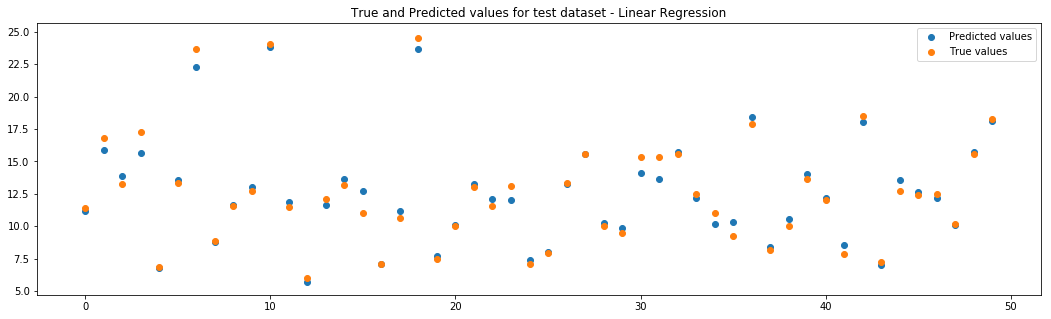

Root Mean Squared Error: [0.68179773]
Mean Absolute Error [0.47079747]
Mean Absolute Percentage Error [3.64006849]


In [21]:
lin_reg_model_metrics = view_metrics(y_test, lin_reg_model_predictions,'Linear Regression', samples = 50, total_samples=2000)
## If predicted value is same as true value, the points will be overlapping. Closer the points, better is the prediction.

2. Random Forest Regressor Model

In [46]:
#max_depth itself states that the max depth of tree is 5. if not specified then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#min_samples_split : int, float, optional (default=2)
#The minimum number of samples required to split an internal node:
#If int, then consider min_samples_split as the minimum number.
#If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
 

rand_forest_model = RandomForestRegressor(max_depth = 6 , n_estimators=20 ,random_state=0) # build model
rand_forest_model = rand_forest_model.fit(x_train, y_train.values.ravel()) # train model
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0,  n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
feature_importance = rand_forest_model.feature_importances_
R2 = rand_forest_model.score(x_train, y_train) # coefficient of determination
rand_forest_model_predictions = rand_forest_model.predict(x_test) # make predictions

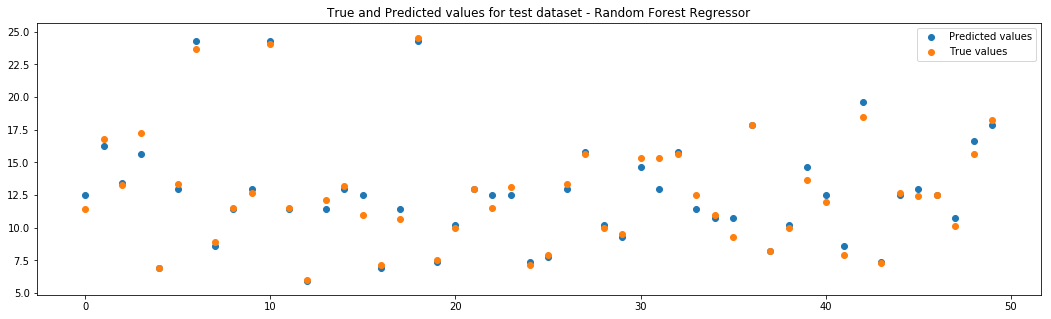

Root Mean Squared Error: [0.81550539]
Mean Absolute Error [0.56914787]
Mean Absolute Percentage Error [4.07711225]


In [47]:
rand_forest_model_metrics = view_metrics(y_test, rand_forest_model_predictions,'Random Forest Regressor', samples = 50, total_samples=2000)

In [48]:
#[estimator.tree_.max_depth for estimator in rand_forest_model.estimators_]
n_estimators = rand_forest_model.estimators_
n_estimators

[DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=209652396, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=398764591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=924231285, splitter='best'),
 DecisionTreeRegressor(criterio

3. Neural Network Regression Model

In [27]:
nn_model = MLPRegressor(hidden_layer_sizes=(10,4),
                                    activation='relu', # activation function in the nodes of the neral net
                                    solver='adam', # optimizer algorithm
                                    learning_rate='constant',
                                    learning_rate_init=0.001, # initial learning rate
                                    max_iter=300, # max iterations to train for
                                    tol = -1, # tolerance for when to stop training should be range 0.001 to 0.0000001, -1 for max_iter
                                    shuffle=True,
                                    verbose=True) # show details at each iteration
nn_model = nn_model.fit(x_train, y_train.values.ravel())

Iteration 1, loss = 55384.60022035
Iteration 2, loss = 24.81153382
Iteration 3, loss = 19.45951210
Iteration 4, loss = 11.18328396
Iteration 5, loss = 5.69158096
Iteration 6, loss = 4.97984485
Iteration 7, loss = 4.99376206
Iteration 8, loss = 3.67045895
Iteration 9, loss = 2.93529010
Iteration 10, loss = 2.76660438
Iteration 11, loss = 2.42777536
Iteration 12, loss = 2.78631434
Iteration 13, loss = 2.07155323
Iteration 14, loss = 4.75811677
Iteration 15, loss = 2.80252677
Iteration 16, loss = 2.83078433
Iteration 17, loss = 1.68680306
Iteration 18, loss = 1.60349988
Iteration 19, loss = 1.56220330
Iteration 20, loss = 1.71192584
Iteration 21, loss = 1.66403986
Iteration 22, loss = 10.87273195
Iteration 23, loss = 1.94527951
Iteration 24, loss = 1.65772958
Iteration 25, loss = 2.97643045
Iteration 26, loss = 1.86580852
Iteration 27, loss = 1.30527347
Iteration 28, loss = 1.24701505
Iteration 29, loss = 1.67923190
Iteration 30, loss = 4.25125139
Iteration 31, loss = 1.18834781
Iteration

In [28]:
nn_model_predictions = nn_model.predict(x_test)

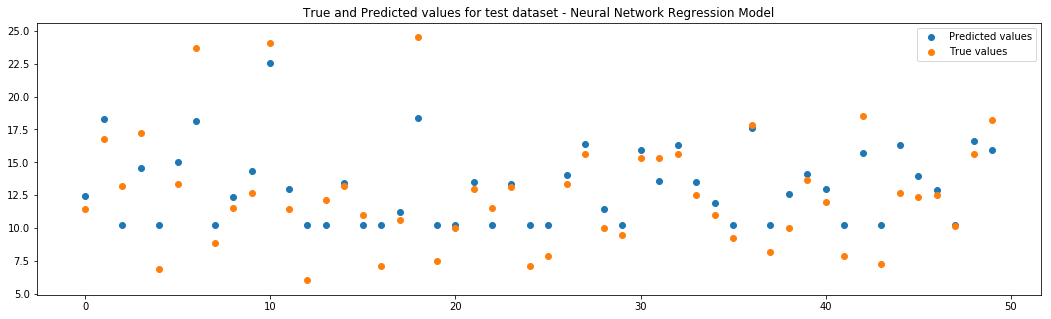

Root Mean Squared Error: [2.10662282]
Mean Absolute Error [1.63271877]
Mean Absolute Percentage Error [15.34381976]


In [29]:
nn_model_metrics = view_metrics(y_test, nn_model_predictions,'Neural Network Regression Model', samples = 50, total_samples=2000)

# Comparing model performances

In [30]:
print("%10s | %7s | %7s | %7s" % ('MODEL', 'RMSE', 'MAE', 'MAPE'))
print('___________________________________________')
for name,metrics in zip(['LIN_REG','RAND_FRST','NN'],[lin_reg_model_metrics, rand_forest_model_metrics, nn_model_metrics]):
    print ("%10s | %.5f | %.5f | %.5f %%" % (name, metrics[0][0], metrics[1][0], metrics[2][0]))
print()
#print('Note: Lower values are better')

     MODEL |    RMSE |     MAE |    MAPE
___________________________________________
   LIN_REG | 0.68180 | 0.47080 | 3.64007 %
 RAND_FRST | 0.95123 | 0.67855 | 4.92627 %
        NN | 2.10662 | 1.63272 | 15.34382 %



# Predicting interest rates

In [31]:
def get_interest_rate(model, features):
    return (model.predict(features))*(max_rate-min_rate) + min_rate

In [32]:
sample = x_test[2:3] # substitute with the input you want to predict the rate for
interest_rate = get_interest_rate(rand_forest_model, sample)
print('Predicted interest rate is:', interest_rate)
print('for the following user profile:')
sample

Predicted interest rate is: [344.10341683]
for the following user profile:


,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,A,B,C,D,E,F,G,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,0,Apr-1955,Apr-1958,Apr-1960,Apr-1961,Apr-1962,Apr-1963,Apr-1964,Apr-1965,Apr-1966,Apr-1967,Apr-1968,Apr-1969,Apr-1970,Apr-1971,Apr-1972,Apr-1973,Apr-1974,Apr-1975,Apr-1976,Apr-1977,Apr-1978,Apr-1979,Apr-1980,Apr-1981,Apr-1982,Apr-1983,Apr-1984,Apr-1985,Apr-1986,Apr-1987,Apr-1988,Apr-1989,Apr-1990,Apr-1991,Apr-1992,Apr-1993,Apr-1994,Apr-1995,Apr-1996,Apr-1997,Apr-1998,Apr-1999,Apr-2000,Apr-2001,Apr-2002,Apr-2003,Apr-2004,Apr-2005,Apr-2006,Apr-2007,Apr-2008,Apr-2009,Apr-2010,Apr-2011,Apr-2012,Aug-1946,Aug-1950,Aug-1951,Aug-1955,Aug-1958,Aug-1959,Aug-1960,Aug-1961,Aug-1962,Aug-1963,Aug-1964,Aug-1965,Aug-1966,Aug-1967,Aug-1968,Aug-1969,Aug-1970,Aug-1971,Aug-1972,Aug-1973,Aug-1974,Aug-1975,Aug-1976,Aug-1977,Aug-1978,Aug-1979,Aug-1980,Aug-1981,Aug-1982,Aug-1983,Aug-1984,Aug-1985,Aug-1986,Aug-1987,Aug-1988,Aug-1989,Aug-1990,Aug-1991,Aug-1992,Aug-1993,Aug-1994,Aug-1995,Aug-1996,Aug-1997,Aug-1998,Aug-1999,Aug-2000,Aug-2001,Aug-2002,Aug-2003,Aug-2004,Aug-2005,Aug-2006,Aug-2007,Aug-2008,Aug-2009,Aug-2010,Aug-2011,Aug-2012,Dec-1950,Dec-1951,Dec-1956,Dec-1958,Dec-1959,Dec-1960,Dec-1961,Dec-1962,Dec-1963,Dec-1964,Dec-1965,Dec-1966,Dec-1967,Dec-1968,Dec-1969,Dec-1970,Dec-1971,Dec-1972,Dec-1973,Dec-1974,Dec-1975,Dec-1976,Dec-1977,Dec-1978,Dec-1979,Dec-1980,Dec-1981,Dec-1982,Dec-1983,Dec-1984,Dec-1985,Dec-1986,Dec-1987,Dec-1988,Dec-1989,Dec-1990,Dec-1991,Dec-1992,Dec-1993,Dec-1994,Dec-1995,Dec-1996,Dec-1997,Dec-1998,Dec-1999,Dec-2000,Dec-2001,Dec-2002,Dec-2003,Dec-2004,Dec-2005,Dec-2006,Dec-2007,Dec-2008,Dec-2009,Dec-2010,Dec-2011,Feb-1957,Feb-1959,Feb-1960,Feb-1961,Feb-1963,Feb-1964,Feb-1965,Feb-1966,Feb-1967,Feb-1968,Feb-1969,Feb-1970,Feb-1971,Feb-1972,Feb-1973,Feb-1974,Feb-1975,Feb-1976,Feb-1977,Feb-1978,Feb-1979,Feb-1980,Feb-1981,Feb-1982,Feb-1983,Feb-1984,Feb-1985,Feb-1986,Feb-1987,Feb-1988,Feb-1989,Feb-1990,Feb-1991,Feb-1992,Feb-1993,Feb-1994,Feb-1995,Feb-1996,Feb-1997,Feb-1998,Feb-1999,Feb-2000,Feb-2001,Feb-2002,Feb-2003,Feb-2004,Feb-2005,Feb-2006,Feb-2007,Feb-2008,Feb-2009,Feb-2010,Feb-2011,Feb-2012,Jan-1944,Jan-1946,Jan-1948,Jan-1950,Jan-1951,Jan-1952,Jan-1953,Jan-1954,Jan-1955,Jan-1956,Jan-1957,Jan-1958,Jan-1959,Jan-1960,Jan-1961,Jan-1962,Jan-1963,Jan-1964,Jan-1965,Jan-1966,Jan-1967,Jan-1968,Jan-1969,Jan-1970,Jan-1971,Jan-1972,Jan-1973,Jan-1974,Jan-1975,Jan-1976,Jan-1977,Jan-1978,Jan-1979,Jan-1980,Jan-1981,Jan-1982,Jan-1983,Jan-1984,Jan-1985,Jan-1986,Jan-1987,Jan-1988,Jan-1989,Jan-1990,Jan-1991,Jan-1992,Jan-1993,Jan-1994,Jan-1995,Jan-1996,Jan-1997,Jan-1998,Jan-1999,Jan-2000,Jan-2001,Jan-2002,Jan-2003,Jan-2004,Jan-2005,Jan-2006,Jan-2007,Jan-2008,Jan-2009,Jan-2010,Ja

# Saving the models

In [ ]:
# this cell may take a few seconds to execute depending on model size

# for saving models
import pickle
# import _pickle as cPickle # try this if previous import fails

model_name = 'best_model.model'
pickle.dump(rand_forest_model, open(model_name, 'wb'))

# Saving data for deployment

In [ ]:
# order is important
features = ["loan_amnt", "term", "installment", "grade", "sub_grade", "emp_length", "home_ownership", "annual_inc",
            "verification_status", "purpose", "addr_state", "dti", "delinq_2yrs", "inq_last_6mths", "loan_status_Binary"]

In [ ]:
prediction_data = [rand_forest_model, df_max, df_min, categories, features]
pickle.dump(prediction_data, open('prediction_data.data', 'wb'))